In [10]:
import Augmentor
from siamese.dataset import DataLoader
from extensies import augmentation as aug
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import skimage.feature as ft
import albumentations
import tensorflow as tf
from imgaug import augmenters as iaa

In [2]:
loader = DataLoader('../../data/',['t2tsetra/t/30x30x1/'])
loader.load_data()
X,y = loader.get_data('t2tsetra/t/30x30x1/')

In [46]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [124]:
aug = albumentations.ElasticTransform(alpha=50, sigma=5, alpha_affine=0,
                                      interpolation=1, border_mode=4,
                                      always_apply=False, approximate=False, p=1)
image = aug(image=X[6])['image']

In [125]:
image.shape

(30, 30, 1)

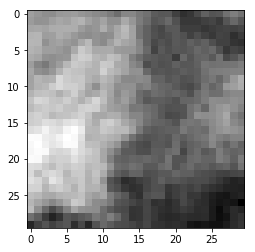

In [126]:

plt.imshow(image.reshape((30,30)),cmap = 'gray')

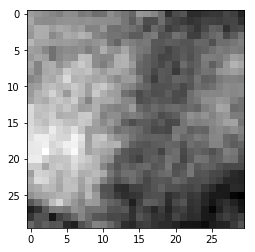

In [136]:
plt.imshow(X[3].reshape((30,30)),cmap = 'gray')

In [73]:
image.max()

0.44791114

In [74]:
X[0].max()

0.46243292

In [4]:
columns = ['date','name','modality','size','model','num_of_data','iterations',
           'normalization','acc','acc_w','acc_p','auc','auc_w','auc_p']

In [3]:
augmentor = aug.ElasticAugmentor(X)
X_train,y_train = augmentor.generate_images(X[:1],y[:1],10)



In [100]:
seg = iaa.Sequential([
   iaa.ElasticTransformation(sigma=8,alpha = 20),
#     iaa.PiecewiseAffine(scale = 0.05,nb_rows=4, nb_cols=4,mode="symetric"),
])

X_train = seg.augment_image(X[0])

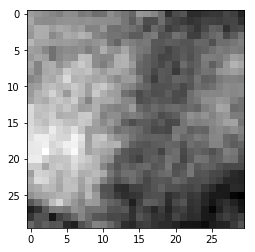

In [101]:
plt.imshow(X[0].reshape((30,30)),cmap = 'gray')

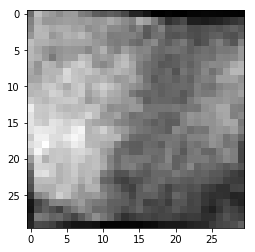

In [102]:
plt.imshow(X_train.reshape((30,30)),cmap = 'gray')

In [31]:
X_train.min()

0.04882654

In [33]:
X[0].min()



0.030411448

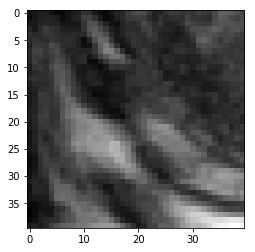

In [41]:
plt.imshow(np.reshape(X_train[0],(40,40)),cmap = 'gray')

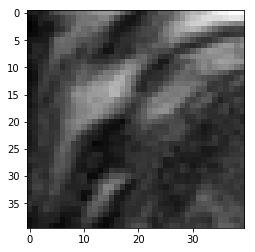

In [38]:
plt.imshow(np.reshape(X[1],(40,40)),cmap = 'gray')

In [27]:
X.max()

0.7688679

In [39]:
X_train[7]

array([[[0.49564052],
        [0.5103957 ],
        [0.5090543 ],
        ...,
        [0.06505701],
        [0.07847083],
        [0.06438632]],

       [[0.44735077],
        [0.46277666],
        [0.46411803],
        ...,
        [0.07780013],
        [0.04828974],
        [0.03487592]],

       [[0.26693493],
        [0.26358148],
        [0.27900738],
        ...,
        [0.07444668],
        [0.03822938],
        [0.01609658]],

       ...,

       [[0.17035547],
        [0.16498993],
        [0.17639168],
        ...,
        [0.08786049],
        [0.06304494],
        [0.0657277 ]],

       [[0.15828303],
        [0.14017437],
        [0.15627097],
        ...,
        [0.07712945],
        [0.06036217],
        [0.04225352]],

       [[0.1529175 ],
        [0.17437962],
        [0.1965124 ],
        ...,
        [0.07645875],
        [0.06170356],
        [0.04560697]]], dtype=float32)

Text(0.5, 1.0, 'Histogram with no zero elements')

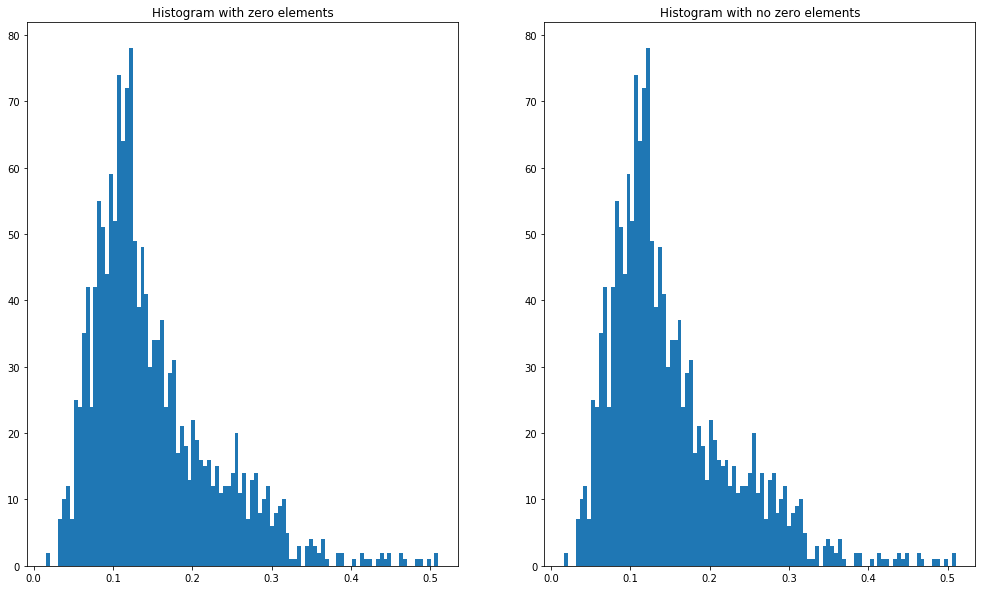

In [45]:
fig = plt.figure(figsize = (17,10))
spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

f2_ax1 = fig.add_subplot(spec2[0, 0])
f2_ax2 = fig.add_subplot(spec2[0, 1])

f2_ax1.hist(X_train[7].flatten(),bins = 100)
f2_ax1.set_title("Histogram with zero elements")

f2_ax2.hist(X[1].flatten(),bins = 100)
f2_ax2.set_title("Histogram with no zero elements")